<a href="https://colab.research.google.com/github/udaybhaskar717/Solar-Irradiance-Forecasting/blob/main/MTP_Stage_IITB_Best_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import sys, os
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt
from matplotlib.pyplot       import figure
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import matplotlib.pyplot     as plt
import seaborn               as sns
import tensorflow as tf
sns.set_style('darkgrid')
import warnings
import datetime              as dt
import matplotlib.dates      as mdates
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from google.colab            import files
warnings.filterwarnings('ignore')

# Data Exploration

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/IITB_Floating_Solar_Power_Plant.csv')

In [ ]:
data

,PeriodEnd,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
0,2014-12-31T01:15:00Z,2014-12-31T01:00:00Z,PT15M,19.6,-112,0.8,16.9,0,0,0,0,24.3,84.3,0.0,1021.8,19,2.4,98,0.11
1,2014-12-31T01:30:00Z,2014-12-31T01:15:00Z,PT15M,19.8,-113,1.5,17.1,0,0,0,0,24.3,84.4,0.0,1022.0,20,2.4,95,0.11
2,2014-12-31T01:45:00Z,2014-12-31T01:30:00Z,PT15M,20.0,-114,2.3,17.3,0,0,0,0,24.4,84.4,0.0,1022.1,22,2.4,91,0.11
3,2014-12-31T02:00:00Z,2014-12-31T01:45:00Z,PT15M,20.1,-115,3.1,17.4,9,0,0,9,24.4,84.5,0.0,1022.3,23,2.3,88,0.11
4,2014-12-31T02:15:00Z,2014-12-31T02:00:00Z,PT15M,20.3,-117,3.8,17.6,31,0,0,31,24.4,84.6,0.0,1022.5,25,2.3,85,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,2022-12-20T22:45:00Z,2022-12-20T22:30:00Z,PT15M,25.1,-105,0.1,13.7,0,0,0,0,21.0,49.1,0.0,1039.0,83,2.6,131,0.11
279543,2022-12-20T23:00:00Z,2022-12-20T22:45:00Z,PT15M,25.1,-105,0.0,13.5,0,0,0,0,21.0,48.6,0.0,1039.0,85,2.7,127,0.11
279544,2022-12-20T23:15:00Z,2022-12-20T23:00:00Z,PT15M,25.0,-106,0.0,13.3,0,0,0,0,21.1,48.2,0.0,1039.1,86,2.7,124,0.11
279545,2022-12-20T23:30:00Z,2022-12-20T23:15:00Z,PT15M,25.0,-107,0.0,13.1,0,0,0,0,21.1,47.7,0.0,1039.2,85,2.7,120,0.11


In [ ]:
data['Date']=pd.to_datetime(data['PeriodStart'])

In [ ]:
data.drop(['PeriodEnd','PeriodStart','Period'],axis=1,inplace=True)

In [ ]:
data

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
0,19.6,-112,0.8,16.9,0,0,0,0,24.3,84.3,0.0,1021.8,19,2.4,98,0.11,2014-12-31 01:00:00+00:00
1,19.8,-113,1.5,17.1,0,0,0,0,24.3,84.4,0.0,1022.0,20,2.4,95,0.11,2014-12-31 01:15:00+00:00
2,20.0,-114,2.3,17.3,0,0,0,0,24.4,84.4,0.0,1022.1,22,2.4,91,0.11,2014-12-31 01:30:00+00:00
3,20.1,-115,3.1,17.4,9,0,0,9,24.4,84.5,0.0,1022.3,23,2.3,88,0.11,2014-12-31 01:45:00+00:00
4,20.3,-117,3.8,17.6,31,0,0,31,24.4,84.6,0.0,1022.5,25,2.3,85,0.11,2014-12-31 02:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,25.1,-105,0.1,13.7,0,0,0,0,21.0,49.1,0.0,1039.0,83,2.6,131,0.11,2022-12-20 22:30:00+00:00
279543,25.1,-105,0.0,13.5,0,0,0,0,21.0,48.6,0.0,1039.0,85,2.7,127,0.11,2022-12-20 22:45:00+00:00
279544,25.0,-106,0.0,13.3,0,0,0,0,21.1,48.2,0.0,1039.1,86,2.7,124,0.11,2022-12-20 23:00:00+00:00
279545,25.0,-107,0.0,13.1,0,0,0,0,21.1,47.7,0.0,1039.2,85,2.7,120,0.11,2022-12-20 23:15:00+00:00


In [ ]:
data['Date']=data.Date.dt.tz_convert('Asia/Kolkata')

In [ ]:
data_09=data[data.Date.dt.year ==2016]
data_09.iloc[-12:,:]

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,0,0,0,17.5,81.9,0.0,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,0,0,0,17.5,82.4,0.0,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,0,0,0,17.5,82.9,0.0,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,0,0,0,17.5,83.4,0.0,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,0,0,0,17.6,83.9,0.0,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
70239,23.1,103,0.0,20.4,0,0,0,0,17.6,84.4,0.0,1026.6,340,2.2,148,0.11,2016-12-31 22:15:00+05:30
70240,23.0,103,0.0,20.4,0,0,0,0,17.6,85.0,0.0,1026.6,344,2.2,151,0.11,2016-12-31 22:30:00+05:30
70241,22.9,104,0.0,20.4,0,0,0,0,17.7,85.5,0.0,1026.6,348,2.2,154,0.11,2016-12-31 22:45:00+05:30
70242,22.8,104,0.0,20.4,0,0,0,0,17.7,86.0,0.0,1026.7,352,2.2,158,0.11,2016-12-31 23:00:00+05:30
70243,22.7,106,0.0,20.3,0,0,0,0,17.7,86.5,0.0,1026.7,356,2.2,161,0.11,2016-12-31 23:15:00+05:30


In [ ]:
data09_20 = data[(data.Date.dt.year >2016) & (data.Date.dt.year<=2021)]
validation_data = data[data.Date.dt.year==2022]

In [ ]:
data17_20=data_09.iloc[-12:,:].append(data09_20)
data17_20.drop('SnowWater',axis=1,inplace=True)
validation_data.drop('SnowWater',axis=1,inplace=True)

In [ ]:
data17_20

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,0,0,0,17.5,81.9,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,0,0,0,17.5,82.4,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,0,0,0,17.5,82.9,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,0,0,0,17.5,83.4,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,0,0,0,17.6,83.9,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245537,25.7,104,0.0,18.4,0,0,0,0,29.6,64.3,1046.6,10,3.7,155,0.11,2021-12-31 22:45:00+05:30
245538,25.7,105,0.0,18.4,0,0,0,0,29.7,64.2,1046.5,13,3.5,158,0.11,2021-12-31 23:00:00+05:30
245539,25.7,106,0.0,18.4,0,0,0,0,29.7,64.0,1046.4,16,3.4,161,0.11,2021-12-31 23:15:00+05:30
245540,25.7,108,0.0,18.4,0,0,0,0,29.8,63.8,1046.4,18,3.3,165,0.11,2021-12-31 23:30:00+05:30


In [ ]:
data_corr=data17_20.corr()

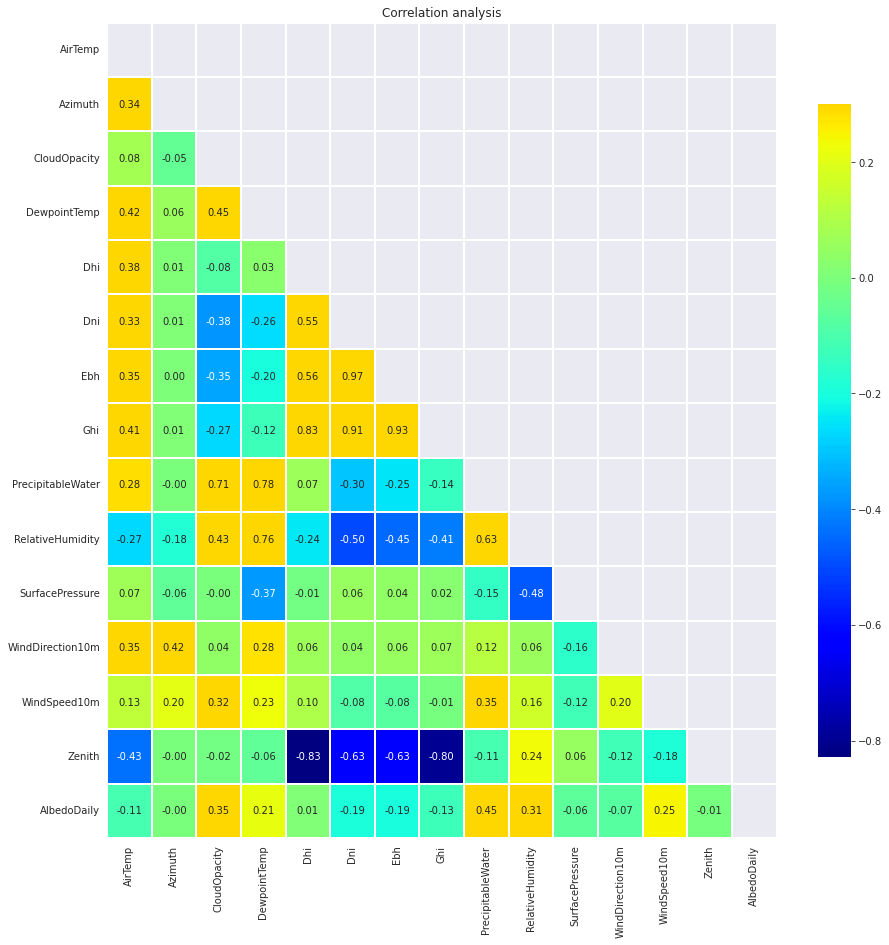

In [ ]:
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_corr,mask=mask,cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
           linewidths=1, cbar_kws={"shrink": .8});
plt.title('Correlation analysis');

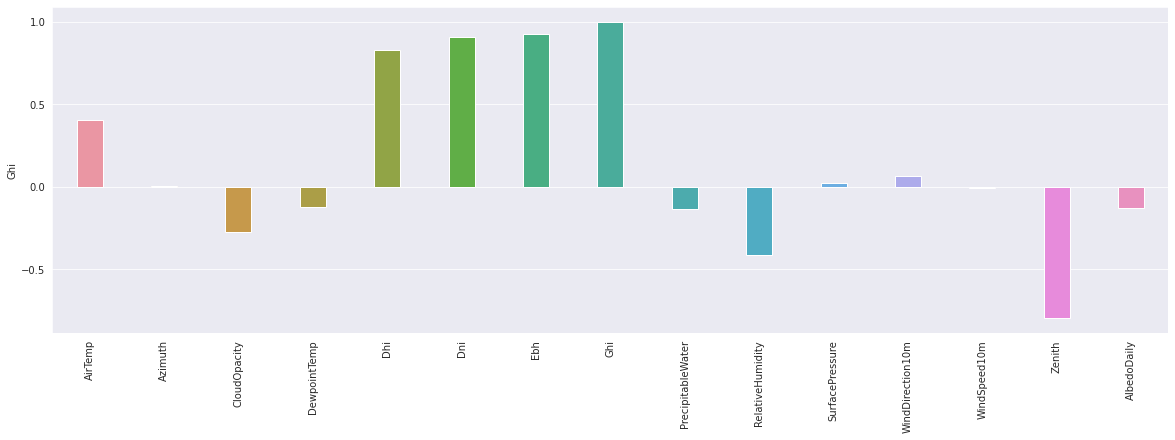

In [ ]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x=data_corr['Ghi'].index,y=data_corr['Ghi'],ax=ax)
change_width(ax, .35)
plt.xticks(rotation=90)
sns.set(font_scale=2)
plt.show()

In [ ]:
X=data17_20.drop(["Dhi","Dni","Ebh"],axis=1)
y=data17_20['Ghi']
X_validation_data=validation_data.drop(["Dhi","Dni","Ebh"],axis=1)
y_validation_data=validation_data['Ghi']

In [ ]:
X

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,17.5,81.9,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,17.5,82.4,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,17.5,82.9,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,17.5,83.4,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,17.6,83.9,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245537,25.7,104,0.0,18.4,0,29.6,64.3,1046.6,10,3.7,155,0.11,2021-12-31 22:45:00+05:30
245538,25.7,105,0.0,18.4,0,29.7,64.2,1046.5,13,3.5,158,0.11,2021-12-31 23:00:00+05:30
245539,25.7,106,0.0,18.4,0,29.7,64.0,1046.4,16,3.4,161,0.11,2021-12-31 23:15:00+05:30
245540,25.7,108,0.0,18.4,0,29.8,63.8,1046.4,18,3.3,165,0.11,2021-12-31 23:30:00+05:30


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=4.8/6,random_state=42,shuffle=False)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,random_state= 8,shuffle=False)

In [ ]:
X_train

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
70234,23.6,104,0.0,20.3,0,17.5,81.9,1026.3,322,2.4,130,0.11,2016-12-31 21:00:00+05:30
70235,23.5,104,0.0,20.3,0,17.5,82.4,1026.4,325,2.3,134,0.11,2016-12-31 21:15:00+05:30
70236,23.4,104,0.0,20.3,0,17.5,82.9,1026.4,329,2.3,137,0.11,2016-12-31 21:30:00+05:30
70237,23.3,103,0.0,20.3,0,17.5,83.4,1026.5,333,2.2,141,0.11,2016-12-31 21:45:00+05:30
70238,23.2,103,0.0,20.4,0,17.6,83.9,1026.5,336,2.2,144,0.11,2016-12-31 22:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210475,27.9,119,4.2,18.6,66,29.1,57.1,1039.5,290,4.1,81,0.11,2020-12-31 17:15:00+05:30
210476,27.6,117,3.3,18.8,39,29.6,58.5,1039.7,296,4.0,84,0.11,2020-12-31 17:30:00+05:30
210477,27.4,116,0.3,18.8,17,29.9,59.4,1039.9,300,4.0,87,0.11,2020-12-31 17:45:00+05:30
210478,27.2,114,0.0,18.9,1,30.2,60.4,1040.1,305,4.1,90,0.11,2020-12-31 18:00:00+05:30


In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data

In [ ]:
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[3] , X_train.drop(['Date','Ghi'],axis=1),X_train.drop(['Date','Ghi'],axis=1).columns )
X_val_scale  = data_scaling( scaling_strategy [3] ,X_val.drop(['Date','Ghi'],axis=1), X_val.drop(['Date','Ghi'],axis=1).columns)
# X_test_scale  = data_scaling( scaling_strategy [3] ,X_test.drop(['Date','Ghi'],axis=1), X_test.drop(['Date','Ghi'],axis=1).columns)
X_validation_scale=data_scaling( scaling_strategy [3] ,X_validation_data.drop(['Date','Ghi'],axis=1), X_validation_data.drop(['Date','Ghi'],axis=1).columns)

In [ ]:
X_train_scale.head(13)

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
70234,0.659218,0.577778,0.0,0.740876,0.191257,0.828109,0.979200,0.894444,0.131148,0.726257,0.916667
70235,0.656425,0.577778,0.0,0.740876,0.191257,0.833165,0.979296,0.902778,0.125683,0.748603,0.916667
70236,0.653631,0.577778,0.0,0.740876,0.191257,0.838220,0.979296,0.913889,0.125683,0.765363,0.916667
70237,0.650838,0.572222,0.0,0.740876,0.191257,0.843276,0.979391,0.925000,0.120219,0.787709,0.916667
70238,0.648045,0.572222,0.0,0.744526,0.192350,0.848332,0.979391,0.933333,0.120219,0.804469,0.916667
70239,0.645251,0.572222,0.0,0.744526,0.192350,0.853387,0.979487,0.944444,0.120219,0.826816,0.916667
70240,0.642458,0.572222,0.0,0.744526,0.192350,0.859454,0.979487,0.955556,0.120219,0.843575,0.916667
70241,0.639665,0.577778,0.0,0.744526,0.193443,0.864510,0.979487,0.966667,0.120219,0.860335,0.916667
70242,0.636872,0.577778,0.0,0.744526,0.193443,0.869565,0.979582,0.977778,0.120219,0.882682,0.916667
70243,0.634078,0.588889,0.0,0.740876,0.193443,0.874621,0.979582,0.988889,0.120219,0.899441,0.916667


In [ ]:
features_train = X_train_scale.to_numpy().tolist()
target_train = y_train.to_list()
features_val = X_val_scale.to_numpy().tolist()
target_val = y_val.to_list()
# features_test = X_test_scale.to_numpy().tolist()
# target_test = y_test.to_list()
features_validation_data=X_validation_scale.to_numpy().tolist()
target_validation_data=y_validation_data.to_list()

In [ ]:
multi_train_target=pd.concat([X_train['Ghi'].shift(-i) for i in range(13)],axis=1).dropna().iloc[:,-12].to_numpy().tolist()

In [ ]:
multi_train_target=pd.concat([X_train['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()
multi_val_target=pd.concat([X_val['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()
# multi_test_target=pd.concat([X_test['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()
multi_validation_data_target=pd.concat([X_validation_data['Ghi'].shift(-i) for i in range(13)],axis=1).iloc[:,-1].dropna().to_numpy().tolist()

In [ ]:
train_generator = TimeseriesGenerator(features_train[:-12],multi_train_target,length=12,sampling_rate=1,batch_size=256,stride=1)
val_generator = TimeseriesGenerator(features_val[:-12],multi_val_target,length=12,sampling_rate=1,batch_size=256,stride=1)
# test_generator = TimeseriesGenerator(features_test[:-12],multi_test_target,length=12,sampling_rate=1,batch_size=1,stride=1)
validation_data_generator=TimeseriesGenerator(features_validation_data[:-12],multi_validation_data_target,length=12,sampling_rate=1,batch_size=1,stride=1)

In [ ]:
model = tf.keras.Sequential()
model.add(LSTM(128,input_shape=(train_generator[0][0].shape[1],train_generator[0][0].shape[2]),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dense(1,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/drive/MyDrive/best_model_iitb_floating.h5')

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
mc = ModelCheckpoint('best_model.h5', monitor='val_mean_absolute_error', mode='min', verbose=1, save_best_only=True)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',patience=2,mode='min')
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.keras.losses.MAE])
with tf.device('/gpu:0'):
  history = model.fit(train_generator,epochs=400,validation_data=val_generator,shuffle=False,callbacks=[mc])

Epoch 1/400
545/548 [============================>.] - ETA: 0s - loss: 1151.8622 - mean_absolute_error: 16.5097
Epoch 1: val_mean_absolute_error did not improve from 35.60063
548/548 [==============================] - 12s 14ms/step - loss: 1151.5857 - mean_absolute_error: 16.5208 - val_loss: 7528.7378 - val_mean_absolute_error: 37.6814
Epoch 2/400
548/548 [==============================] - ETA: 0s - loss: 1241.6095 - mean_absolute_error: 16.8140
Epoch 2: val_mean_absolute_error did not improve from 35.60063
548/548 [==============================] - 7s 12ms/step - loss: 1241.6095 - mean_absolute_error: 16.8140 - val_loss: 7178.5010 - val_mean_absolute_error: 37.1150
Epoch 3/400
547/548 [============================>.] - ETA: 0s - loss: 1174.1444 - mean_absolute_error: 16.5333
Epoch 3: val_mean_absolute_error did not improve from 35.60063
548/548 [==============================] - 7s 12ms/step - loss: 1174.7169 - mean_absolute_error: 16.5429 - val_loss: 7134.3247 - val_mean_absolute_err

In [ ]:
model.save('/content/drive/MyDrive/best_model_iitb_floating_1.h5')

Text(0, 0.5, 'Mean Squared Error')

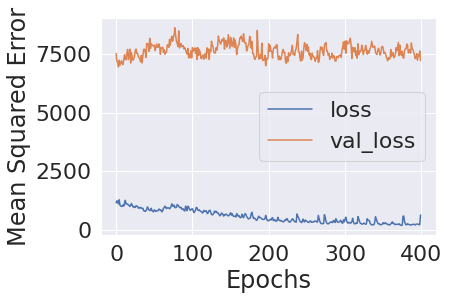

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")

# Train

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predictions = model.predict(train_generator)
pred=predictions.reshape(-1,1)
predictions.shape
pred_=[]
for i in pred:
    pred_.append(i[0])

548/548 [==============================] - 5s 7ms/step


In [ ]:
model.evaluate(train_generator)

548/548 [==============================] - 7s 13ms/step - loss: 1208.7422 - mean_absolute_error: 14.7743


[1208.7421875, 14.77432632446289]

In [ ]:
mean_absolute_error(pred,y_train[predictions.shape[0]*-1:])

14.774328003159324

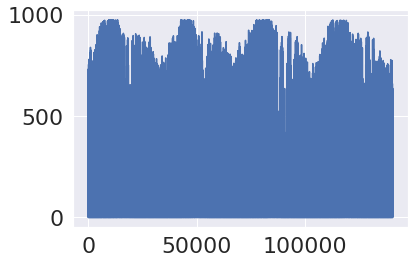

In [ ]:
plt.plot(pred_)

In [ ]:
df_final_train = pd.DataFrame({'Predicted':pred_,'Actual':y_train[predictions.shape[0]*-1:],'Date': X_train["Date"][predictions.shape[0]*-1:]})

Text(0, 0.5, 'Ghi')

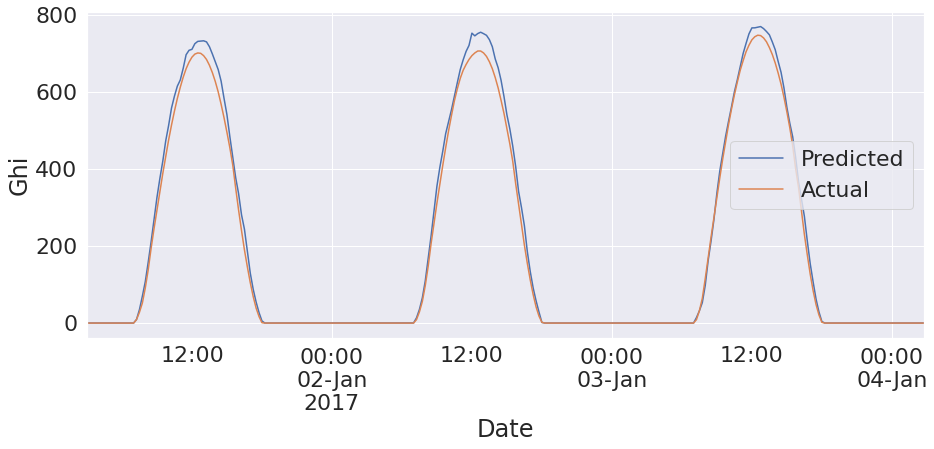

In [ ]:
sns.set(font_scale=2)
df_final_train.set_index('Date')[['Predicted','Actual']].iloc[96*0:96*3,:].plot(figsize=(15,6))
plt.ylabel('Ghi')

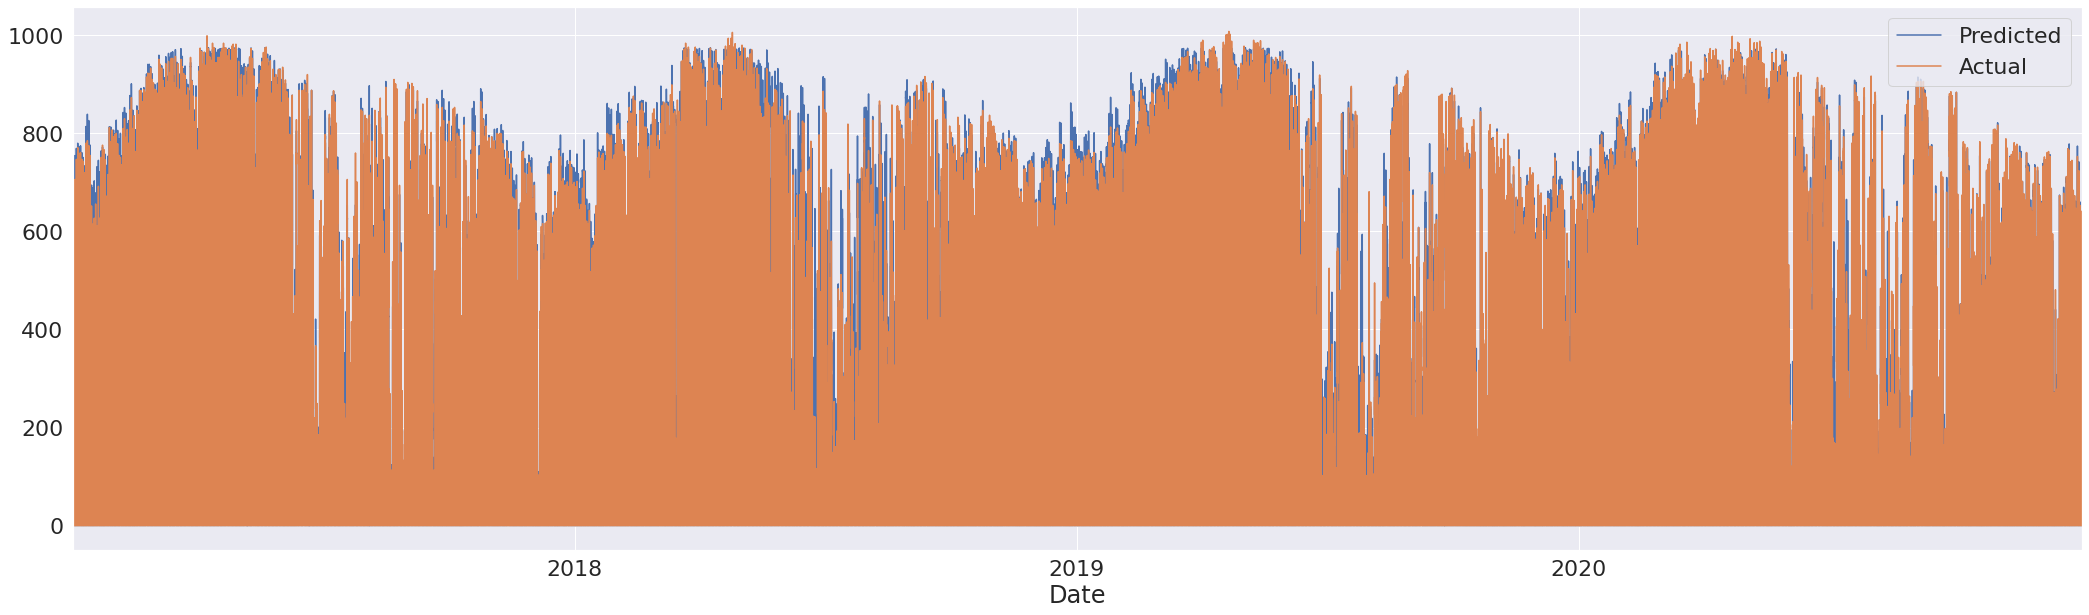

In [ ]:
df_final_train.set_index('Date')[['Predicted','Actual']].plot(figsize=(36,10))

Text(0, 0.5, 'Predicted')

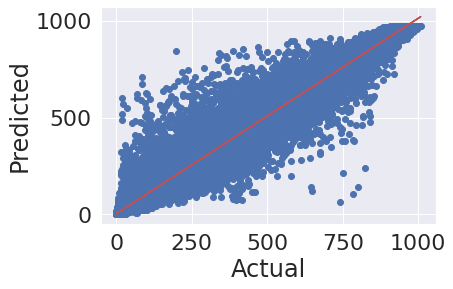

In [ ]:
plt.scatter(y=df_final_train['Predicted'],x=df_final_train['Actual'])
z = np.polyfit(df_final_train['Actual'], df_final_train['Predicted'], 1)
p = np.poly1d(z)

# Display the Trendline
plt.plot(df_final_train['Actual'], p(df_final_train['Actual']),color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Validation

In [ ]:
predictions_val = model.predict(val_generator)
pred_val=predictions_val.reshape(-1,1)
pred_val_=[]
for i in pred_val:
    pred_val_.append(i[0])

137/137 [==============================] - 1s 7ms/step


In [ ]:
df_final_val = pd.DataFrame({'Predicted':pred_val_,'Actaul':y_val[predictions_val.shape[0]*-1:],'Date': X_val["Date"][predictions_val.shape[0]*-1:]})

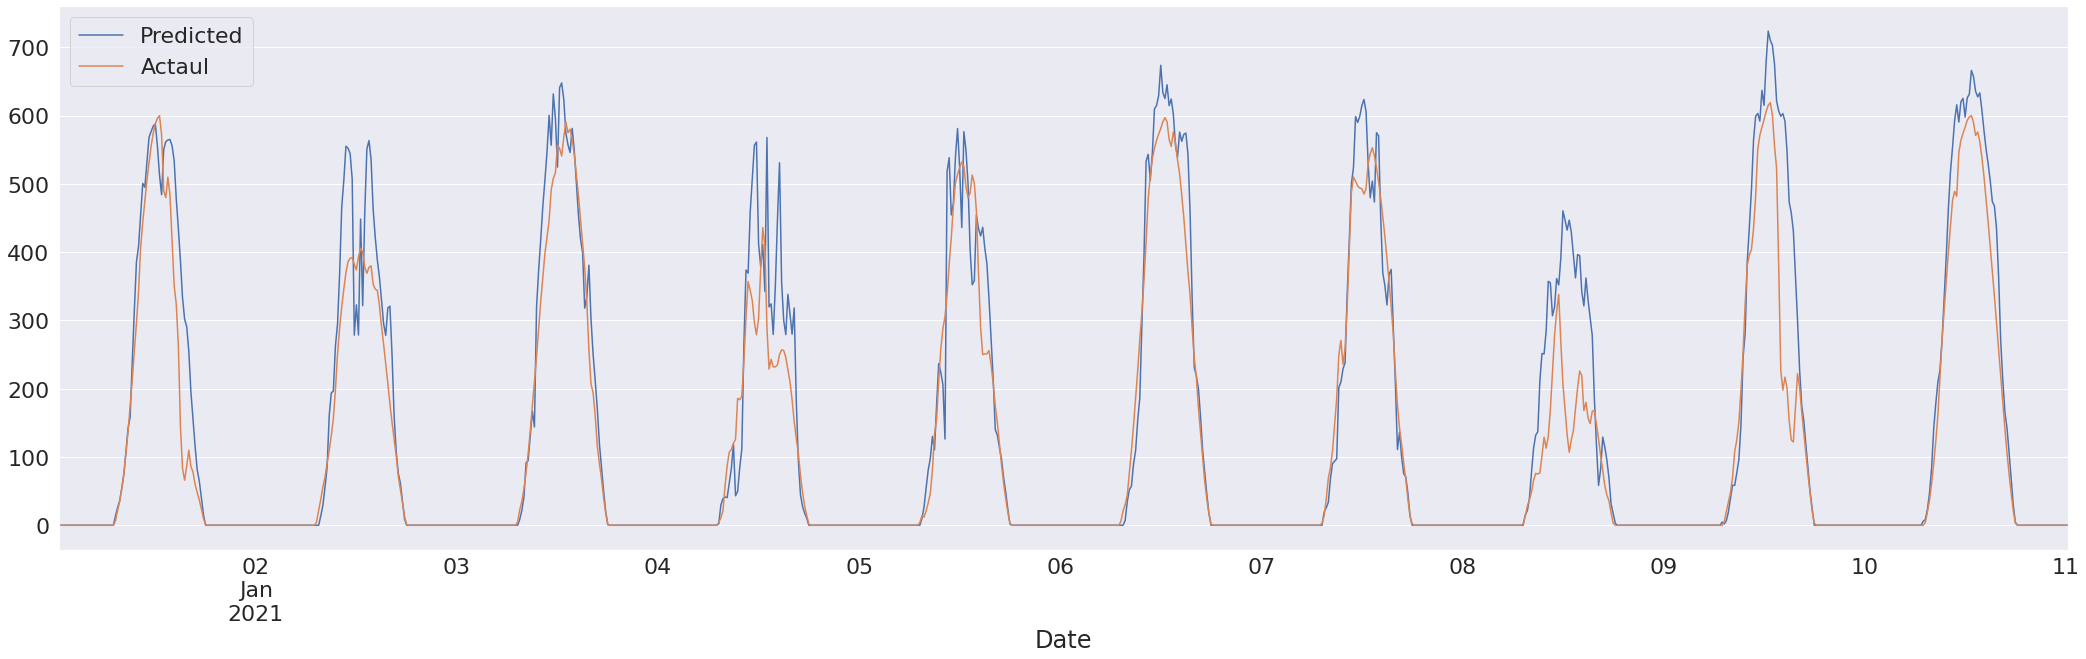

In [ ]:
df_final_val.set_index('Date')[['Predicted','Actaul']].iloc[0:96*10,:].plot(figsize=(36,10))

In [ ]:
model.evaluate(val_generator)

137/137 [==============================] - 1s 7ms/step - loss: 7229.9482 - mean_absolute_error: 36.4955


[7229.9482421875, 36.495548248291016]

In [ ]:
mean_absolute_error(pred_val_,y_val[predictions_val.shape[0]*-1:])

36.49554962470657

In [ ]:
from sklearn.metrics import r2_score
r2_score(pred_val_,y_val[predictions_val.shape[0]*-1:])

0.9041567331512523

# Test

In [ ]:
predictions_test = model.predict(validation_data_generator)
pred_test=predictions_test.reshape(-1,1)
pred_test_=[]
for i in pred_test:
    pred_test_.append(i[0])

33981/33981 [==============================] - 133s 4ms/step


In [ ]:
df_final_test = pd.DataFrame({'Predicted':pred_test_,'Actaul':y_validation_data[predictions_test.shape[0]*-1:],'Date': X_validation_data["Date"][predictions_test.shape[0]*-1:]})

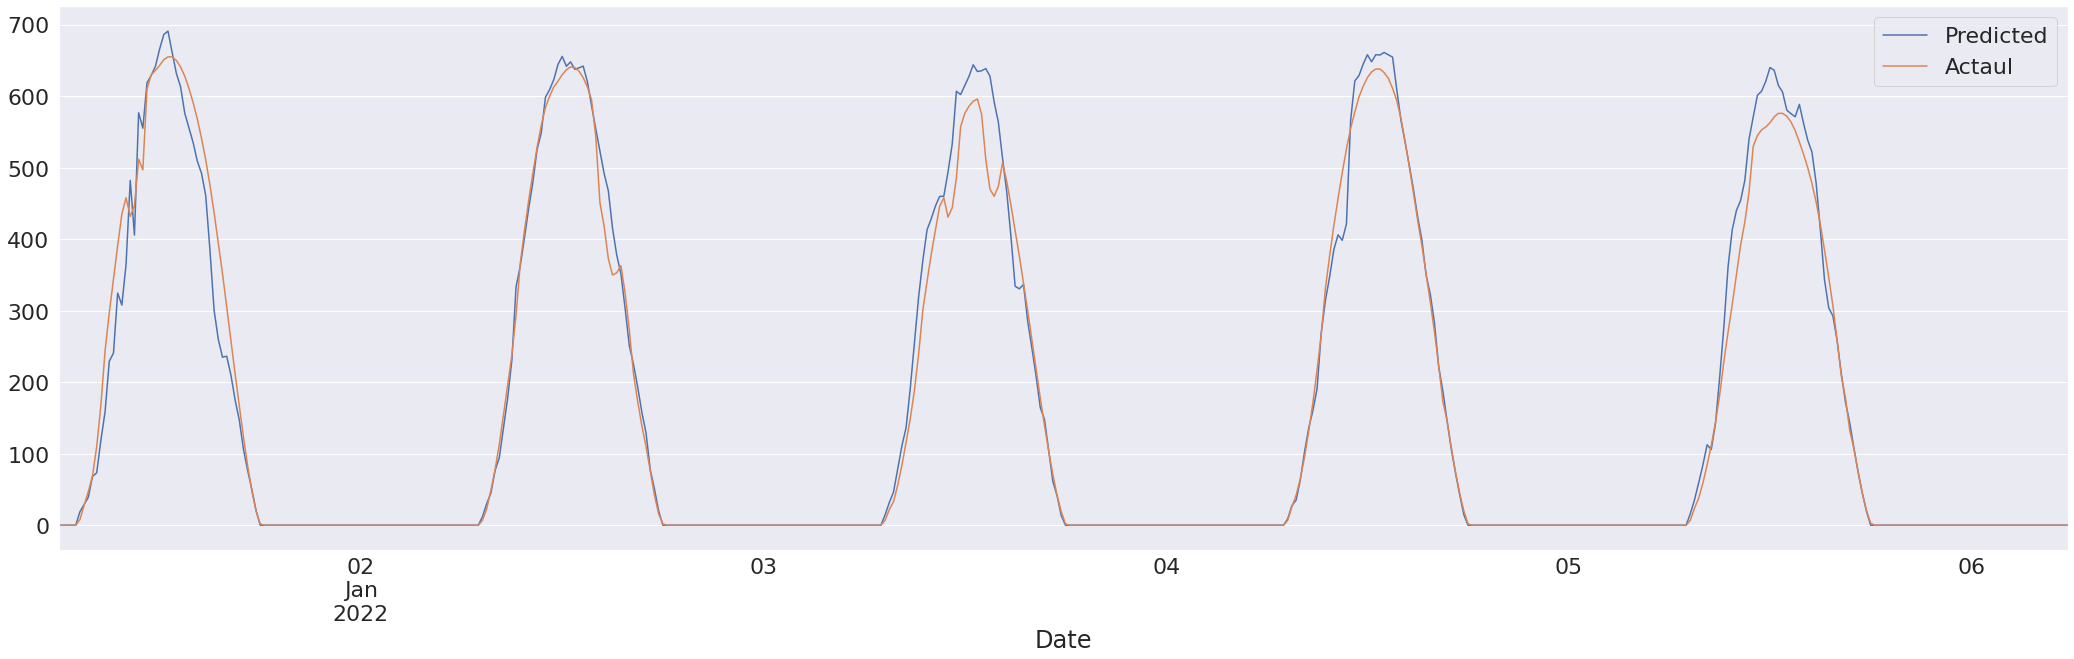

In [ ]:
df_final_test.set_index('Date')[['Predicted','Actaul']].iloc[0:96*5,:].plot(figsize=(36,10))

In [ ]:
df_final_test

,Predicted,Actaul,Date
245566,0.108439,0,2022-01-01 06:00:00+05:30
245567,0.108439,0,2022-01-01 06:15:00+05:30
245568,0.108439,0,2022-01-01 06:30:00+05:30
245569,0.108439,0,2022-01-01 06:45:00+05:30
245570,0.108439,0,2022-01-01 07:00:00+05:30
...,...,...,...
279542,0.108439,0,2022-12-21 04:00:00+05:30
279543,0.108439,0,2022-12-21 04:15:00+05:30
279544,0.108439,0,2022-12-21 04:30:00+05:30
279545,0.108439,0,2022-12-21 04:45:00+05:30


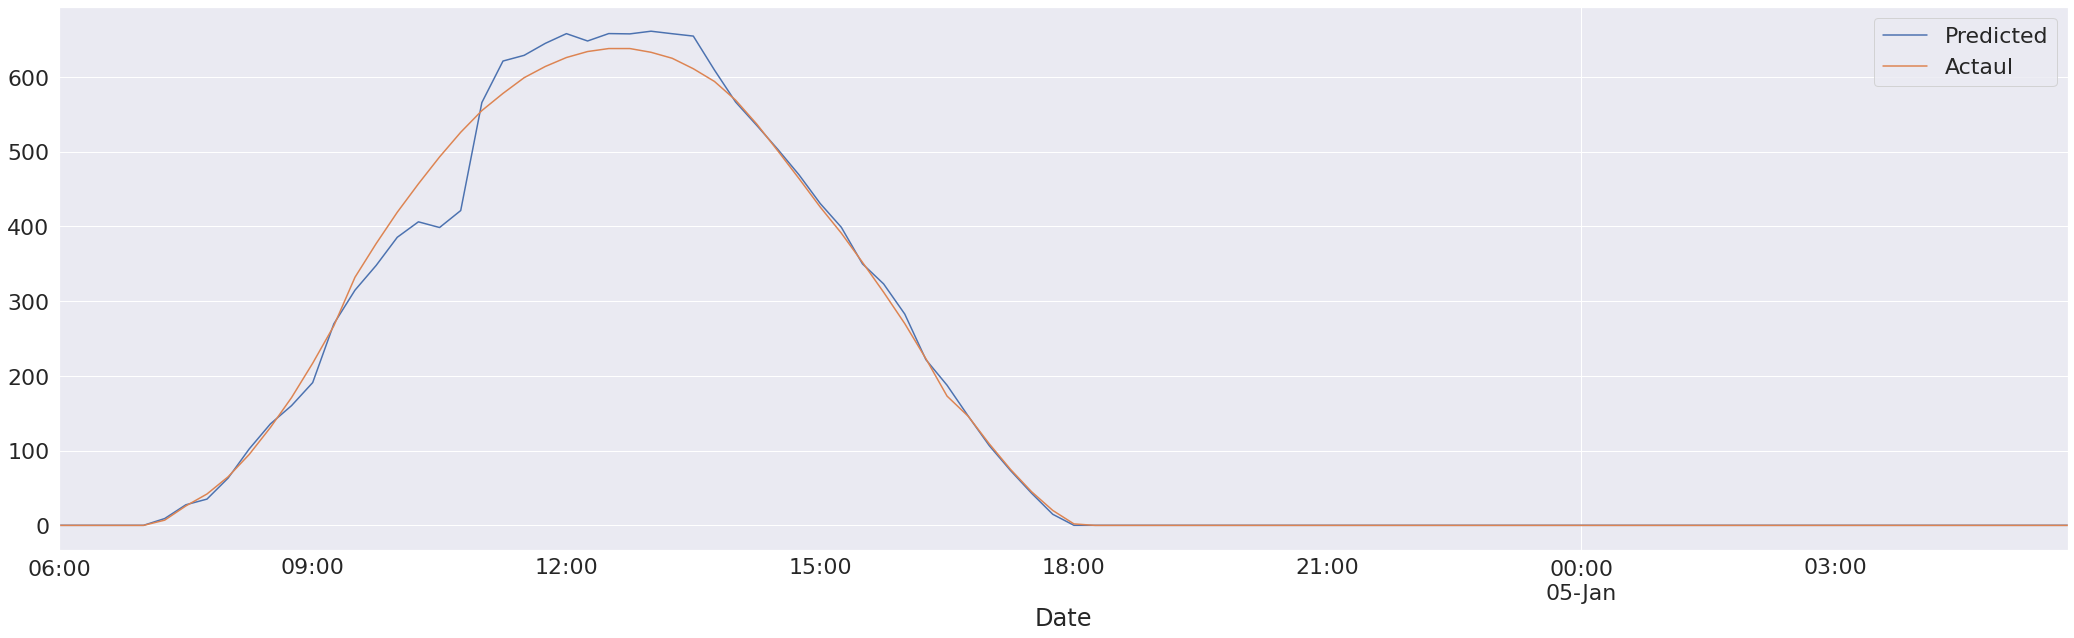

In [ ]:
df_final_test.set_index('Date')[['Predicted','Actaul']].iloc[96*3:96*4,:].plot(figsize=(36,10))

In [ ]:
model.evaluate(validation_data_generator)

33981/33981 [==============================] - 157s 5ms/step - loss: 7916.8638 - mean_absolute_error: 38.0055


[7916.86376953125, 38.005516052246094]

In [ ]:
mean_absolute_error(pred_test_,y_validation_data[predictions_test.shape[0]*-1:])

38.00230241736317

In [ ]:
from sklearn.metrics import r2_score
r2_score(pred_test_,y_validation_data[predictions_test.shape[0]*-1:])

0.8941592971887098

In [ ]:
df_final_test.set_index('Date')[['Predicted','Actual']].iloc[96*1:96*2,:].plot(figsize=(10,5))
plt.ylabel('Ghi')

# Merging

In [ ]:
validation_data

,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily,Date
245542,25.6,120,0.0,18.2,0,0,0,0,29.8,63.4,1046.3,22,3.0,171,0.11,2022-01-01 00:00:00+05:30
245543,25.6,136,0.0,18.1,0,0,0,0,29.8,63.1,1046.3,24,2.9,174,0.11,2022-01-01 00:15:00+05:30
245544,25.5,172,0.0,17.9,0,0,0,0,29.7,62.8,1046.3,27,2.8,176,0.11,2022-01-01 00:30:00+05:30
245545,25.5,-147,0.0,17.8,0,0,0,0,29.7,62.4,1046.3,32,2.7,175,0.11,2022-01-01 00:45:00+05:30
245546,25.5,-124,0.0,17.6,0,0,0,0,29.6,61.9,1046.3,37,2.7,172,0.11,2022-01-01 01:00:00+05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279542,25.1,-105,0.1,13.7,0,0,0,0,21.0,49.1,1039.0,83,2.6,131,0.11,2022-12-21 04:00:00+05:30
279543,25.1,-105,0.0,13.5,0,0,0,0,21.0,48.6,1039.0,85,2.7,127,0.11,2022-12-21 04:15:00+05:30
279544,25.0,-106,0.0,13.3,0,0,0,0,21.1,48.2,1039.1,86,2.7,124,0.11,2022-12-21 04:30:00+05:30
279545,25.0,-107,0.0,13.1,0,0,0,0,21.1,47.7,1039.2,85,2.7,120,0.11,2022-12-21 04:45:00+05:30


In [ ]:
df_final_test

,Predicted,Actaul,Date
245566,0.108439,0,2022-01-01 06:00:00+05:30
245567,0.108439,0,2022-01-01 06:15:00+05:30
245568,0.108439,0,2022-01-01 06:30:00+05:30
245569,0.108439,0,2022-01-01 06:45:00+05:30
245570,0.108439,0,2022-01-01 07:00:00+05:30
...,...,...,...
279542,0.108439,0,2022-12-21 04:00:00+05:30
279543,0.108439,0,2022-12-21 04:15:00+05:30
279544,0.108439,0,2022-12-21 04:30:00+05:30
279545,0.108439,0,2022-12-21 04:45:00+05:30


In [ ]:
resulted_Data_frame=pd.merge(validation_data.drop('Ghi',axis=1), df_final_test.iloc[:,:-2], left_index=True, right_index=True)

In [ ]:
resulted_Data_frame.to_csv('IITB_PredictedGHI.csv')